In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use('seaborn-v0_8-darkgrid')

In [6]:
# setup supervised dataset
X = np.arange(-1, 1, 0.01)
np.random.shuffle(X)
Y_actual = (-2 * (X ** 2)) - X + 2 + (0.2 * np.random.normal(0,1,len(X)))

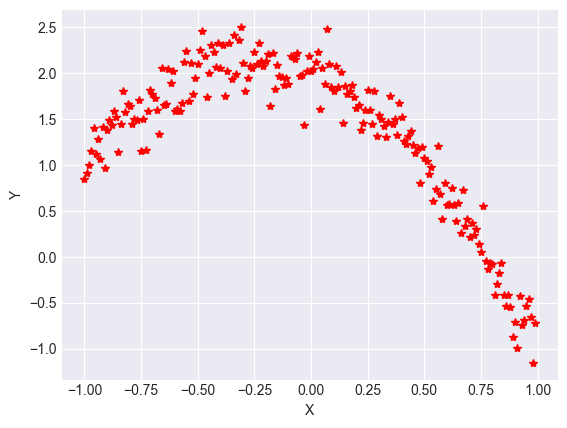

In [7]:
plt.figure()
plt.plot(X, Y_actual, "*", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [9]:
# split the dataset into training and testing dataset
def split_dataset(X, Y, train_percent=70):
    idx = int((len(X) * train_percent) / 100)
    X_train, Y_train  = X[:idx], Y[:idx]
    X_test, Y_test = X[idx:], Y[idx:]
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = split_dataset(X, Y_actual, train_percent=80)

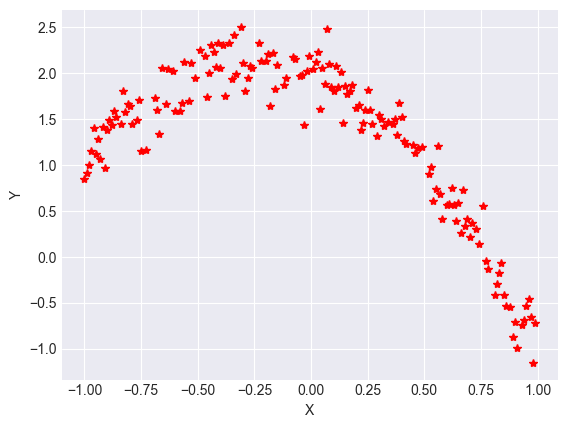

In [11]:
# plot training dataset
plt.figure()
plt.plot(X_train, Y_train, "*", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

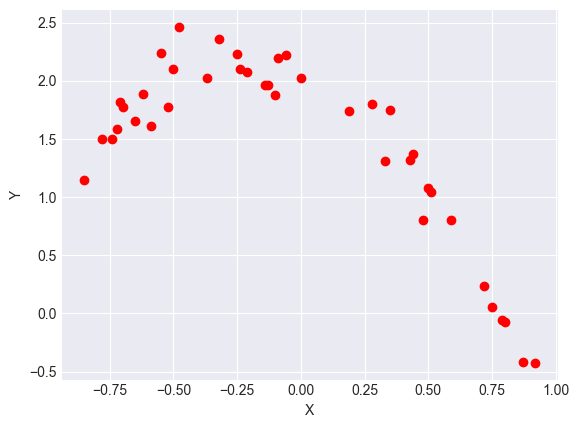

In [12]:
# plot the testing dataset
plt.figure()
plt.plot(X_test, Y_test, "o", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [13]:
def make_random_start(total_nums, seed=42):
    np.random.seed(seed)
    return np.random.rand(total_nums)

In [14]:
def prediction(X, params):
    Y_pred = params[0] + (params[1] * X) + (params[2] * (X ** 2))
    return Y_pred

In [18]:
def training(X, Y, lr=0.1, epochs=1000, patience=5, tolerance=1e-6):
    params = make_random_start(3)
    cost_per_epoch = []

    unchanged_count = 0
    prev_params = params.copy()

    for _ in range(epochs):
        cost = 0
        dJ_dtheta0, dJ_dtheta1, dJ_dtheta2 = 0, 0, 0

        for i in range(len(X)):
            Y_pred = prediction(X[i], params)
            error = Y_pred - Y[i]
            cost = cost + (error ** 2)
            dJ_dtheta0 = dJ_dtheta0 + error
            dJ_dtheta1 = dJ_dtheta1 + (error * X[i])
            dJ_dtheta2 = dJ_dtheta2 + (error * (X[i] ** 2))
        
        # average
        cost = cost / len(X)
        cost_per_epoch.append(cost)

        # update params
        params[0] = params[0] - (2 * lr * dJ_dtheta0)/len(X)
        params[1] = params[1] - (2 * lr * dJ_dtheta1)/len(X)
        params[2] = params[2] - (2 * lr * dJ_dtheta2)/len(X)

        if all(abs(params[i] - prev_params[i]) < tolerance for i in range(3)):
            unchanged_count += 1
        else:
            unchanged_count = 0

        if unchanged_count >= patience:
            break;

        prev_params = params.copy()

    return params, cost_per_epoch


Training params: [ 1.99715902 -1.0082234  -2.00075395]


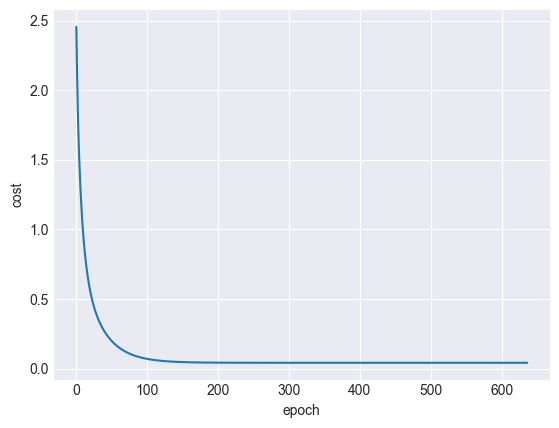

In [20]:
params, cost_per_epoch = training(X_train, Y_train)
print(f"Training params: {params}")
plt.figure()
plt.plot(cost_per_epoch)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

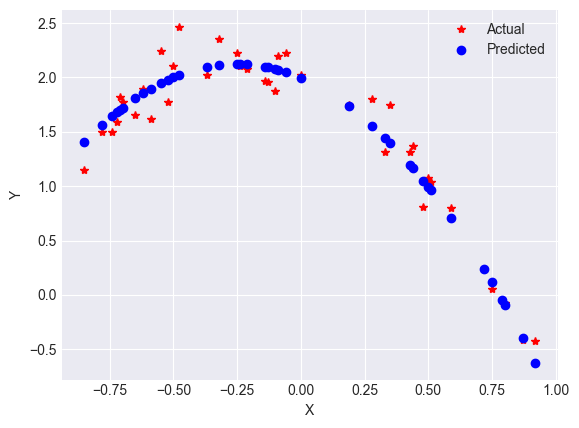

In [21]:
Y_pred = prediction(X_test, params)
plt.figure()
plt.plot(X_test, Y_test, "*", color="red", label="Actual")
plt.plot(X_test, Y_pred, "o", color="blue", label="Predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()